In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
df.drop(columns=['CustomerID'],inplace=True)

In [10]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [18]:
from sklearn.preprocessing import StandardScaler

In [20]:
df1=df.drop(['Gender'],axis=1)

In [22]:
SC = StandardScaler()
df2= SC.fit_transform(df1)

In [23]:
from sklearn.cluster import KMeans

In [25]:
#Cluster for Age and Spending Score(1-100)
mds=df2[:,[0,2]]
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(mds)
    wcss.append(km.inertia_)

C:\Users\harsh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


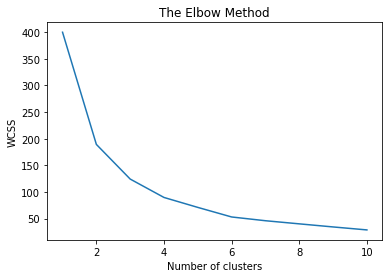

In [35]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [36]:
kmeans1 = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans1 = kmeans_1.fit_predict(mds)


In [37]:
y_kmeans1

array([0, 2, 0, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 0, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 0, 0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       2, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 0, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2])

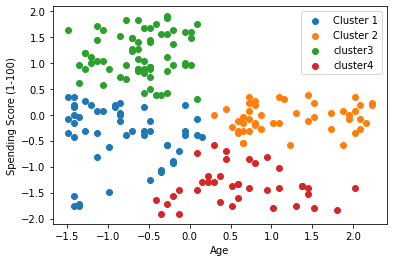

In [42]:
plt.scatter(mds[y_kmeans1==0,0],mds[y_kmeans1==0,1],label="Cluster 1")
plt.scatter(mds[y_kmeans1==1,0],mds[y_kmeans1==1,1],label="Cluster 2")
plt.scatter(mds[y_kmeans1==2,0],mds[y_kmeans1==2,1],label="cluster3")
plt.scatter(mds[y_kmeans1==3,0],mds[y_kmeans1==3,1],label="cluster4")
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [43]:
#Cluster for Age and Annual Income(k$)
mds1=df2[:,[0,1]]
wcss1=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(mds1)
    wcss1.append(km.inertia_)

C:\Users\harsh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


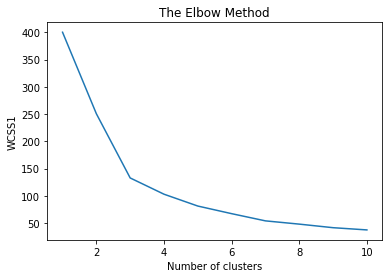

In [44]:
plt.plot(range(1, 11), wcss1)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS1')
plt.show()

In [45]:
kmeans2= KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans2 = kmeans2.fit_predict(mds)
y_kmeans2

array([4, 0, 4, 0, 4, 0, 2, 0, 2, 0, 3, 0, 2, 0, 2, 0, 4, 0, 2, 0, 4, 0,
       2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 0, 1, 0,
       2, 0, 1, 4, 4, 4, 1, 0, 4, 3, 1, 1, 1, 3, 4, 1, 3, 4, 3, 1, 3, 4,
       1, 3, 4, 4, 3, 1, 3, 3, 3, 4, 1, 1, 4, 1, 3, 1, 3, 1, 4, 1, 1, 4,
       0, 1, 3, 4, 1, 1, 4, 4, 1, 4, 1, 4, 4, 1, 3, 4, 1, 4, 3, 1, 3, 3,
       3, 4, 1, 4, 4, 4, 3, 1, 1, 1, 4, 1, 1, 0, 4, 0, 1, 0, 2, 0, 2, 0,
       4, 0, 4, 0, 2, 0, 4, 0, 2, 0, 4, 0, 4, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

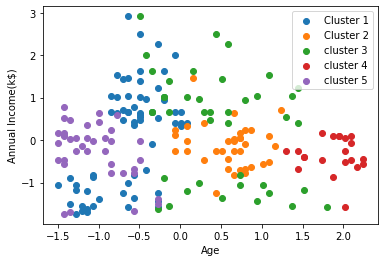

In [46]:
plt.scatter(mds1[y_kmeans2==0,0],mds1[y_kmeans2==0,1],label="Cluster 1")
plt.scatter(mds1[y_kmeans2==1,0],mds1[y_kmeans2==1,1],label="Cluster 2")
plt.scatter(mds1[y_kmeans2==2,0],mds1[y_kmeans2==2,1],label="cluster 3")
plt.scatter(mds1[y_kmeans2==3,0],mds1[y_kmeans2==3,1],label="cluster 4")
plt.scatter(mds1[y_kmeans2==4,0],mds1[y_kmeans2==4,1],label="cluster 5")
plt.xlabel('Age')
plt.ylabel('Annual Income(k$)')
plt.legend()
plt.show()

In [51]:
#Cluster for Annual Income(k$) and Spending Score(1-100)
mds2=df2[:,[1,2]]
wcss2=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(mds2)
    wcss2.append(km.inertia_)

C:\Users\harsh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


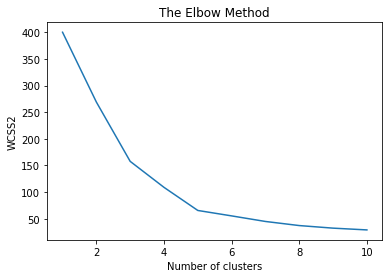

In [52]:
plt.plot(range(1, 11), wcss2)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS2')
plt.show()

In [53]:
kmeans3=KMeans(n_clusters = 5,init='k-means++',random_state = 42)
y_kmeans3=kmeans3.fit_predict(mds2)
y_kmeans3

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

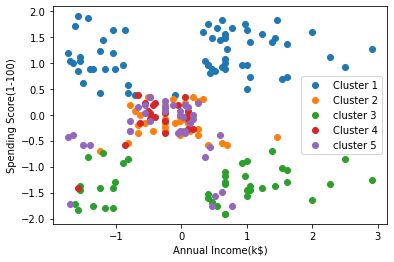

In [54]:
plt.scatter(mds2[y_kmeans2==0,0],mds2[y_kmeans2==0,1],label="Cluster 1")
plt.scatter(mds2[y_kmeans2==1,0],mds2[y_kmeans2==1,1],label="Cluster 2")
plt.scatter(mds2[y_kmeans2==2,0],mds2[y_kmeans2==2,1],label="cluster 3")
plt.scatter(mds2[y_kmeans2==3,0],mds2[y_kmeans2==3,1],label="Cluster 4")
plt.scatter(mds2[y_kmeans2==4,0],mds2[y_kmeans2==4,1],label="cluster 5")
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()